# DICE 2013R (Rocky Road flavour)

This notebook compares DICE.jl to the `DICE2013_032813.gms` GAMS file and Includes directory.

In [1]:
# For Solving #
using DICE;

# For Comparing with GAMS data
using NBInclude;
@nbinclude("../GAMS/GAMS_Compare.ipynb")

# For Additional Plots
# using Plots

version = v2013R(RockyRoad)

v2013R (Rocky Road flavour)

## Base Price Scenario

Similar to the Vanilla version of 2013R, a base and optimal price scenario exist.

We will quickly compare them, as they should mimic the Vanilla version.

In [12]:
base = solve(BasePrice, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3954
Number of nonzeros in inequality constraint Jacobian.:      177
Number of nonzeros in Lagrangian Hessian.............:      957

Total number of variables............................:     1561
                     variables with only lower bounds:      540
                variables with lower and upper bounds:      180
                     variables with only upper bounds:       60
Total number of equality constraints.................:     1391
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Base (current policy) carbon price scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 720 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 300 constraints
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 671 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
Nonlinear: 539 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [13]:
params = loadGAMSResults(version, BasePrice);

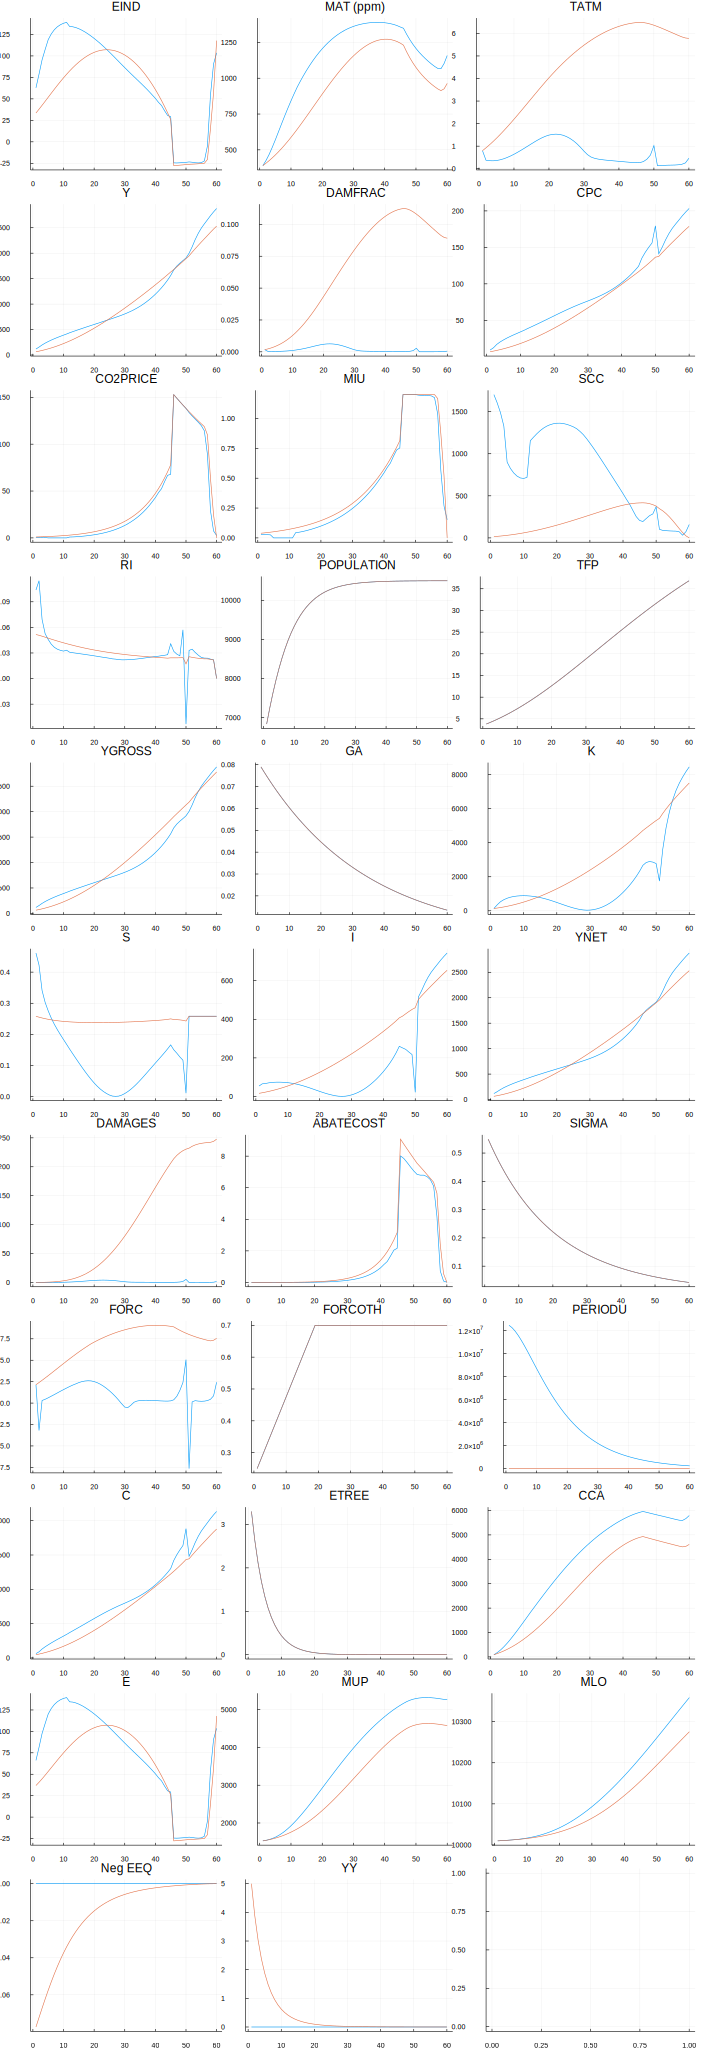

In [14]:
plotComparison(base, params)

CONOPT Utility = `2668.2118865871`

In [15]:
base.results.UTILITY

7.715078137320381e10

# Optimal Price Scenario

In [2]:
opt = solve(OptimalPrice, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3954
Number of nonzeros in inequality constraint Jacobian.:      177
Number of nonzeros in Lagrangian Hessian.............:      957

Total number of variables............................:     1561
                     variables with only lower bounds:      599
                variables with lower and upper bounds:      121
                     variables with only upper bounds:       60
Total number of equality constraints.................:     1391
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Optimal carbon price scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 720 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 241 constraints
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 671 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
Nonlinear: 539 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [3]:
oparams = loadGAMSResults(version, OptimalPrice);

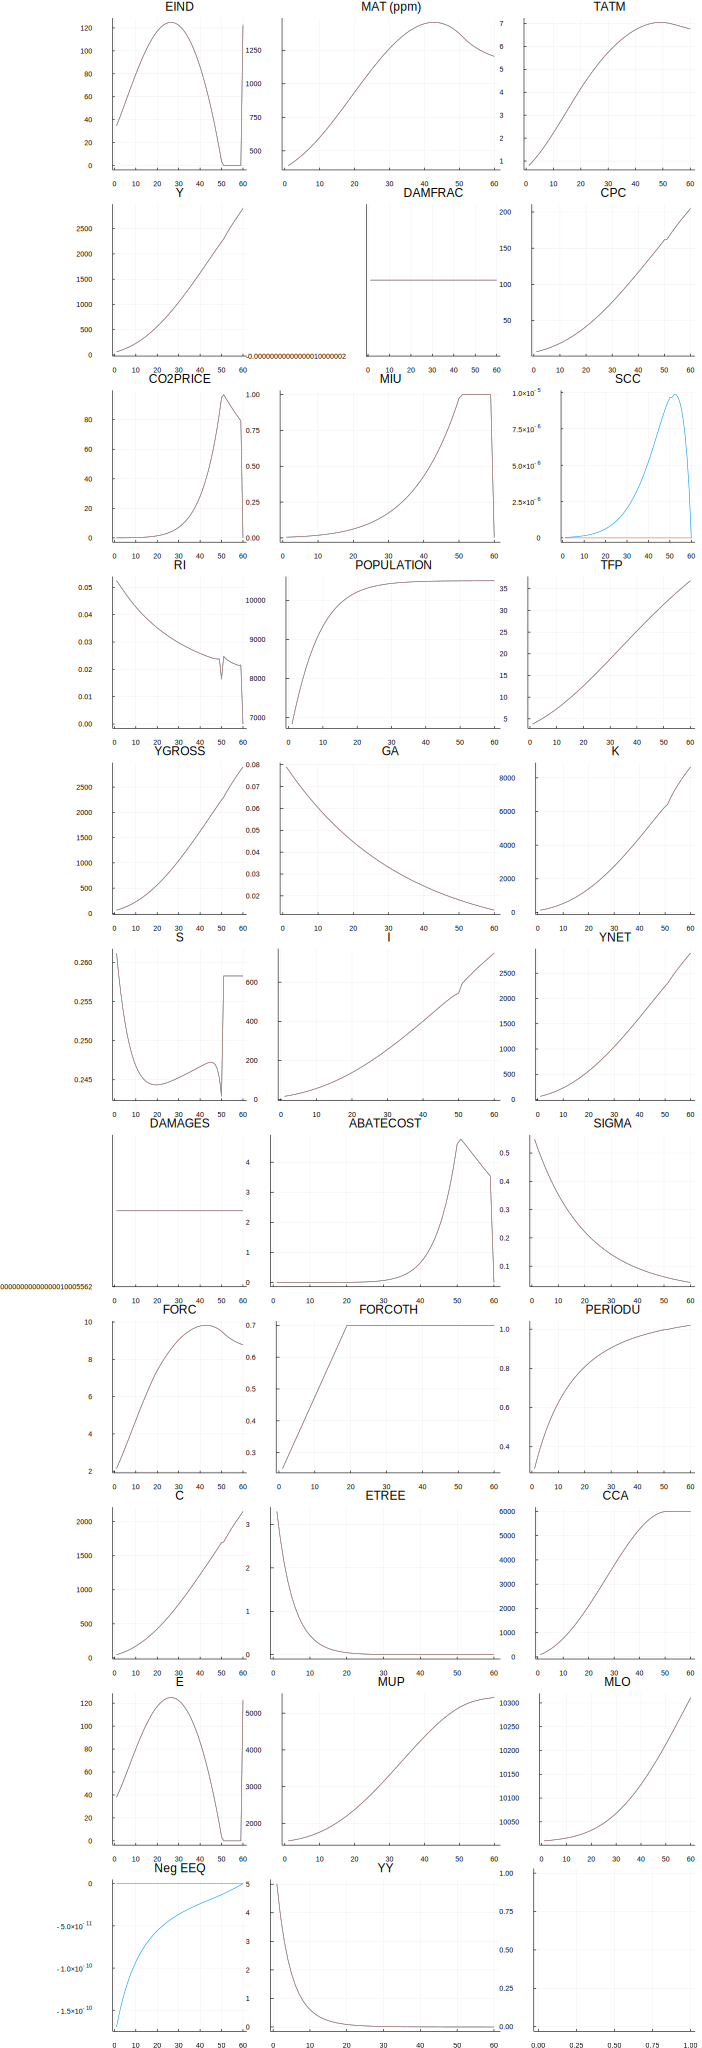

In [4]:
plotComparison(opt, oparams)

We see that in the GAMS version, our SCC is zero&mdash;whereas the DICE.jl version has some small value. This comes about from precision difference: GAMS is using 32bit floats, DICE.jl is using 64bit ones. In addition to this, results are truncated to ten decimals and don't use scientific notation.


CONOPT Utility = `2741.2318406380`

In [8]:
opt.results.UTILITY

2741.231829332526

# Limit 2 Degrees Scenario

From here, we are getting into the more unique scenarios of the Rocky Road version, but their analysis needs to be no different.

In [ ]:
# This one spools forever currently. Not advisable to run this section at the moment.
#lim2 = solve(Limit2Degrees, version)

In [ ]:
l2params = loadGAMSResults(version, Limit2Degrees);

In [ ]:
plotComparison(lim2, l2params)

# Stern Scenario

In [ ]:
stern = solve(Stern, version)

In [ ]:
sparams = loadGAMSResults(version, Stern);

In [ ]:
plotComparison(stern, sparams)

# Stern Calibrated Scenario

This one is wonky atm, so we will look at it last.

In [ ]:
#sterncal = solve(SternCalibrated, version)

In [ ]:
scparams = loadGAMSResults(version, SternCalibrated);

In [ ]:
plotComparison(sterncal, scparams)

# Copenhagen Scenario

In [ ]:
cop = solve(Copenhagen, version)

In [ ]:
copparams = loadGAMSResults(version, Copenhagen);

In [ ]:
plotComparison(cop, copparams)